RNNs to predict time series data, weather patterns using a historical dataset.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [28]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/datasets/weatherHistory.csv')

In [29]:
# Select relevant columns
data = data[['Formatted Date', 'Temperature (C)']]

In [30]:
# Convert 'Formatted Date' to datetime and set it as the index
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'])
data.set_index('Formatted Date', inplace=True)

In [31]:
data.dropna(inplace=True)

In [32]:
# Normalize data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [33]:
# Split data into training and testing sets
train_size = int(len(data_scaled) * 0.8)
train, test = data_scaled[0:train_size], data_scaled[train_size:]


In [34]:
# Create sequences
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        sequences.append(seq)
    return np.array(sequences)

seq_length = 10
X_train = create_sequences(train, seq_length)
y_train = train[seq_length:]

X_test = create_sequences(test, seq_length)
y_test = test[seq_length:]

In [35]:
# Build the RNN model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [36]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
2411/2411 [==============================] - 16s 6ms/step - loss: 0.0043 - val_loss: 5.5787e-04
Epoch 2/10
2411/2411 [==============================] - 15s 6ms/step - loss: 6.5733e-04 - val_loss: 3.9996e-04
Epoch 3/10
2411/2411 [==============================] - 15s 6ms/step - loss: 6.0193e-04 - val_loss: 3.8151e-04
Epoch 4/10
2411/2411 [==============================] - 14s 6ms/step - loss: 5.8647e-04 - val_loss: 4.0211e-04
Epoch 5/10
2411/2411 [==============================] - 16s 7ms/step - loss: 5.7554e-04 - val_loss: 4.8933e-04
Epoch 6/10
2411/2411 [==============================] - 15s 6ms/step - loss: 5.6393e-04 - val_loss: 3.8106e-04
Epoch 7/10
2411/2411 [==============================] - 16s 7ms/step - loss: 5.4966e-04 - val_loss: 3.4366e-04
Epoch 8/10
2411/2411 [==============================] - 15s 6ms/step - loss: 5.3801e-04 - val_loss: 3.3391e-04
Epoch 9/10
2411/2411 [==============================] - 15s 6ms/step - loss: 5.2924e-04 - val_loss: 3.2951e-04
Epoch

In [37]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test)

603/603 [==============================] - 2s 4ms/step


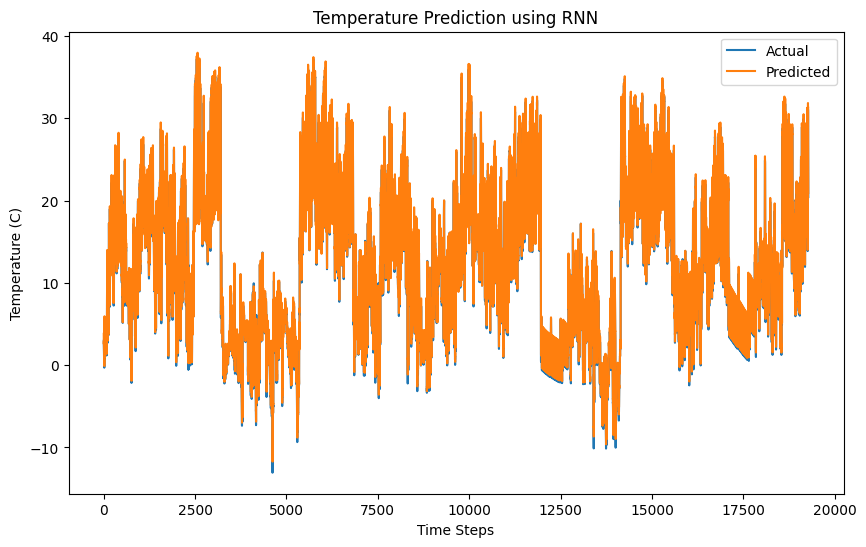

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Temperature Prediction using RNN')
plt.xlabel('Time Steps')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()